# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```O18,D = Picarro.FullRun(filename)```

and returns two instances of the Isotope class.

In [3]:
RUN = pica.FullRun("example_data/HKDS2009_IsoWater_20191114_105042.csv")

Running the corrections for Oxygen 
 ... 
 ...
Standard dev too high get rid of measurement 4
Standard dev is good
Standard dev is good
Standard dev is good
Standard dev too high get rid of measurement 4
Standard dev too high get rid of measurement 3
Standard dev is good
too high std. deviation
Standard dev is good
Standard dev is good
Standard dev is good
3
missing measurements 1 and 3
get rid of measurements  1 and 3
['1', '3']
Standard dev is good
Standard dev is good
1
missing measurements 4 and 2
get rid of measurements  4 and 2
['4', '2']
Standard dev too high get rid of measurement 2
Standard dev is good
Standard dev too high get rid of measurement 3
Standard dev is good
Measured:0.59 --- Standard: 0.60 --- Difference: +0.01 
Measured:-29.89 --- Standard: -29.88 --- Difference: +0.01 
Measured:-13.38 --- Standard: -13.40 --- Difference: +0.02 
Done! 
 ... 
 ...
 ... 
 ...
Running the corrections for Deuterium 
 ... 
 ...
Standard dev is good
Standard dev is good
Standard dev is 

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns two objects of class **Isotope**. The first one contains Oxygen data, the second, deuterium. 
To be used thus:

``` O18,D = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



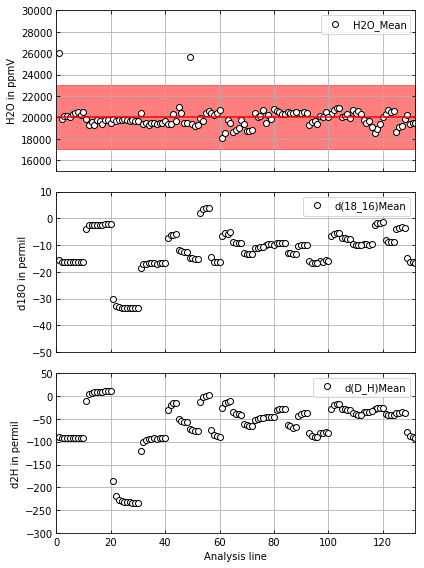

In [4]:
RUN.O18.plotSummary()

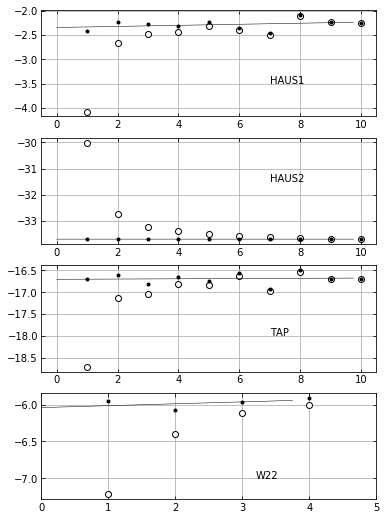

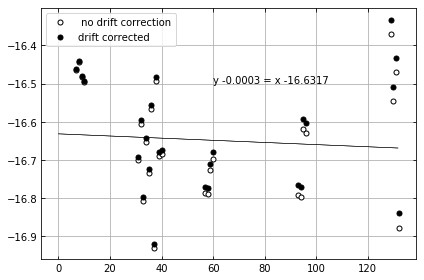

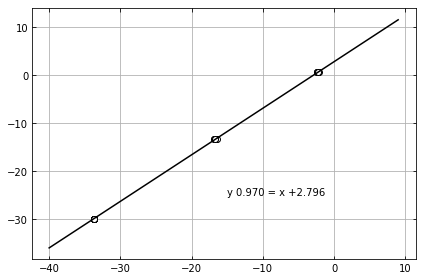

In [5]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

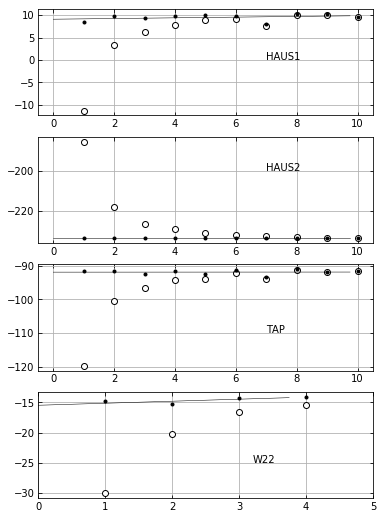

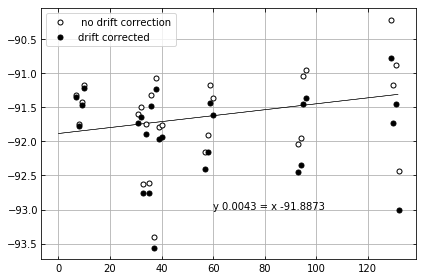

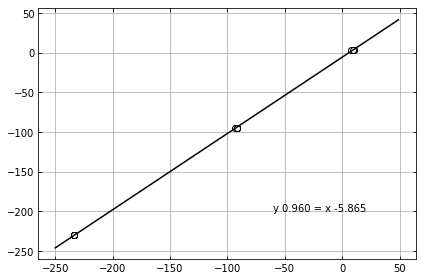

In [ ]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

In [ ]:
RUN.Plot()

#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [ ]:
RUN.coeffs